#  A/B-тест интернет магазина
[Просмотр и предобработка данных](#1-bullet)

[Часть 1. Приоритизация гипотез](#2-bullet)

* ICE
* RICE

[Часть 2. Анализ A/B-теста](#3-bullet)
* Подсчеты
* Выводы
Задача - определить стоит ли продолжать тест или какая-то группа победила. В начале определим самые перспективные гипотезы. Посмотрим работу теста на сырых данных. Сравним средний чек и конверсию. Затем очистим данные от выбросов и посмотрим те же показатели по чистым данным.

## Просмотр и предобработка данных <a id='1-bullet'></a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
data.columns = map(str.lower, data.columns) #преобразование столбцов к нижнему регистру

In [4]:
#Данные для А/В теста
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
#Меням формат времени
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [6]:
#посетители
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [7]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Часть 1. Приоритизация гипотез<a id='2-bullet'></a> 

In [8]:
data['ICE']= data['impact']* data['confidence'] /data['efforts']

print(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


In [9]:
data['RICE']= data['impact']*data['reach']* data['confidence'] /data['efforts']
print(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


## Часть 2. Анализ A/B-теста<a id='3-bullet'></a> 
В этом разделе сначала построим графики по сырым данным. Посмотрим конверсию, средний чек, проверим на наличие выбросов.
Затем очистим данные от выбросов
Посмотрим статисчическую значимость отличий по данным чистым и неочищенным

In [10]:
# Собираем агрегированные кумулятивные данные по дням заказов
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [11]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData= ordersAggregated.merge(visitorsAggregated, left_on= ['date','group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


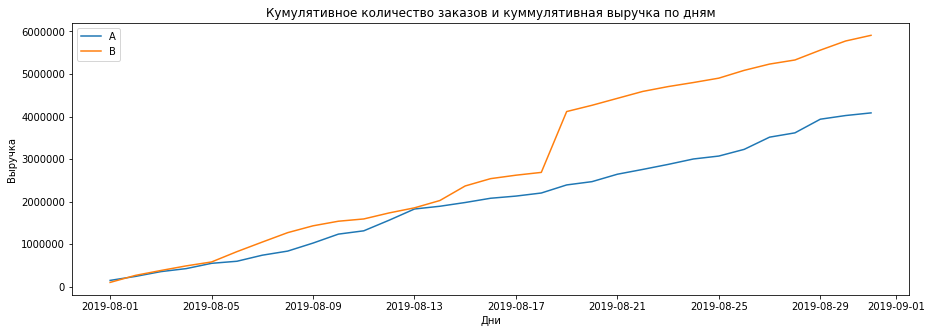

In [12]:
# Кумулятивное количество заказов и куммулятивная выручка по дням 
plt.figure(figsize=(15,5))
plt.title("Кумулятивное количество заказов и куммулятивная выручка по дням")
plt.xlabel("Дни")
plt.ylabel("Выручка")
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

### Вывод
По этим данным похоже, что кумулятивная выручка тестовой группы В больше, чем группы А. Не считая станного скачка 19 августа (запуск новой акции? увеличение рекламу?) график не вызывает вопросов, В уверенно опережает А по количеству выручки. Но если дело  в выбросе, то, возможно не все так радужно.


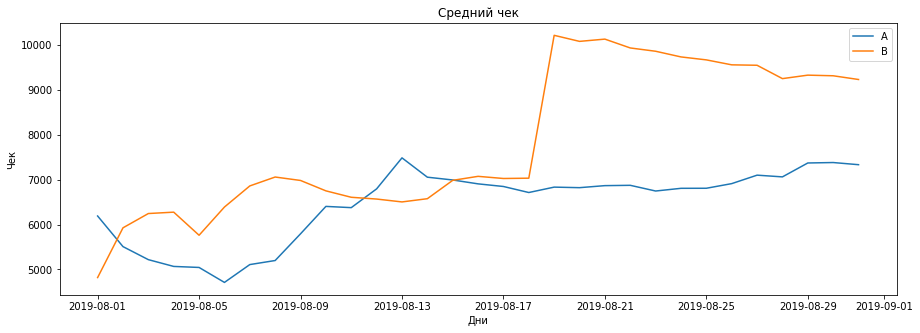

In [13]:
# Средний чек
plt.figure(figsize=(15,5))
plt.title("Средний чек")
plt.xlabel("Дни")
plt.ylabel("Чек")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

### Вывод
По этим данным похоже, что средний чек тестовой группы В так же больше, чем группы А. Не известно, значим ли этот результат. На графике слишком крутая кривая, возможно, дело в выбросе. 


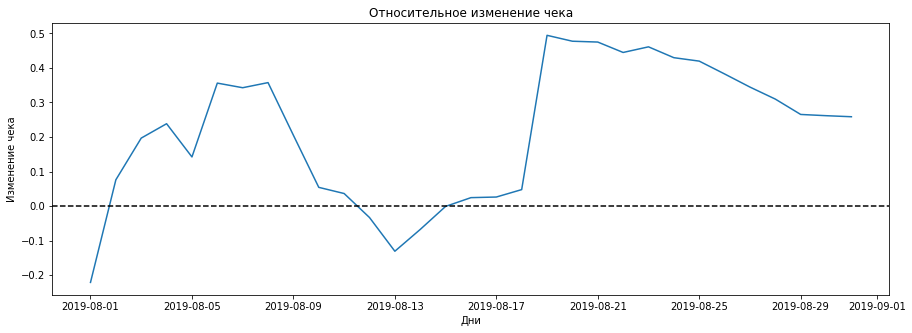

In [14]:
# Относительное изменение чека

plt.figure(figsize=(15,5))
plt.title("Относительное изменение чека")
plt.xlabel("Дни")
plt.ylabel("Изменение чека")
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 

### Вывод
Средний чек группы В сначала уступал чеку А, потом превосходил, был небольшой провал 13 августа, но вскоре вернулся к прежнему превосходству. Надо уточнить насколько значимо это отличие. И нет ли проблемы в выбросах.  Слишком круто кривая поднялась вверх. Может дело в каки-то скидках?

['2019-08-01', '2019-08-31', 0.02, 0.05]

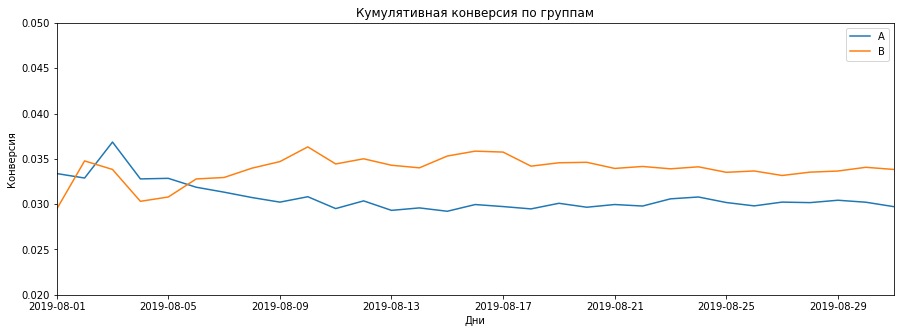

In [15]:
# график кумулятивной конверсии по группам
plt.figure(figsize=(15,5))
plt.title("Кумулятивная конверсия по группам")
plt.xlabel("Дни")
plt.ylabel("Конверсия")

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.05]) 

### Вывод
Группа В в плане конверсии превосходит группу А. В начале было превосходство А, но уже 6 вагуста ситуация начала меняться, стабильно В превосходит А.

['2019-08-01', '2019-08-31', -0.2, 0.3]

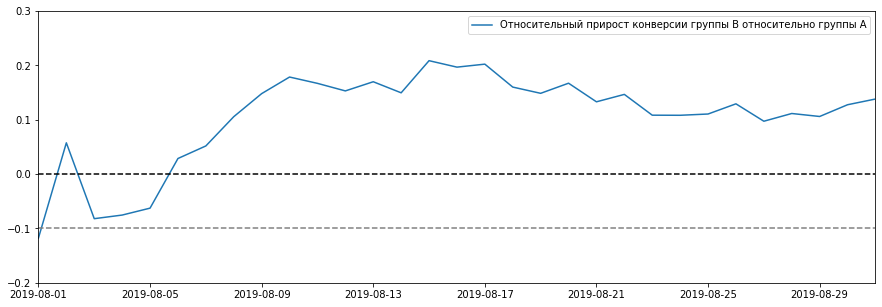

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3]) 


###  Вывод
В начале группа В отставала от группы А, но потом значительно стала превосходить.



In [17]:
# Посмотрим на количество заказов по пользователям
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']



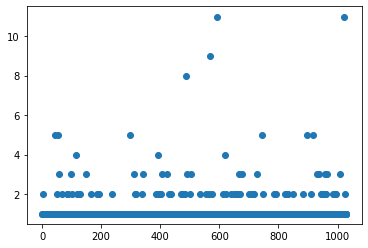

In [18]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

### Вывод
Большинство пользователей совершают 1-2 заказа, редко больше. Для болеее точных данных посмотрим на перцентили заказов. 

In [19]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


### Вывод
99% заказов не больше 4. Разумно выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней

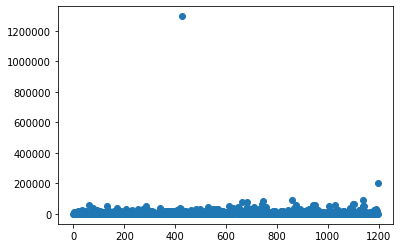

In [20]:
# график количества заказов по пользователям
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

In [21]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


### Вывод

95% заказов совершаются на сумму 28000 и 99% на сумму 58233. 58 тыс рублей можно считать границей для отсеивания аномальных заказов



In [43]:
# Считаем по неочищенным данным конверсию
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']].drop_duplicates()
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']].drop_duplicates()

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.008
0.138


In [44]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

orders_a = orders[orders['group']=='A'].drop_duplicates()
orders_b = orders[orders['group']=='B'].drop_duplicates()
orders_group = orders_b.groupby('date').agg({'visitorId':'nunique', 'revenue':'sum'})
orders_group_b = visitorsBDaily.merge(orders_group, on='date') 
orders_group_b['conv']= orders_group_b['visitors']/orders_group_b['visitorId']
orders_group_a= orders_a.groupby('date').agg({'visitorId':'nunique', 'revenue':'sum'})

orders_group_aa = visitorsADaily.merge(orders_group_a, on='date')
orders_group_aa['conv']= orders_group_aa['visitors']/orders_group_aa['visitorId']
orders_group_aa

In [24]:
# Создадим новую таблицу с чистыми данными
orders_new0 = ordersByUsers.merge(orders, left_on = 'userId', right_on= 'visitorId')
orders_new= orders_new0.query('revenue <= 58233 and orders <=4 ')
orders_new['date'] = pd.to_datetime(orders_new['date'])


In [25]:
datesGroups_new = orders_new[['date', 'group']].drop_duplicates()
ordersAggregated_new = datesGroups_new.apply(lambda x: orders_new[np.logical_and(orders_new['date'] <= x['date'], orders_new['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


cumulativeData_new= ordersAggregated_new.merge(visitorsAggregated, left_on= ['date','group'], right_on=['date', 'group'])
cumulativeData_new.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData_new['conversion'] = cumulativeData_new['orders']/cumulativeData_new['visitors']

cumulativeDataA_new = cumulativeData_new[cumulativeData_new['group']=='A']

cumulativeDataB_new = cumulativeData_new[cumulativeData_new['group']=='B']
cumulativeData_new

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,19,19,78258,713,0.026648
2,2019-08-02,A,43,37,236601,1338,0.032138
3,2019-08-02,B,42,41,240301,1294,0.032457
4,2019-08-03,A,67,61,349074,1845,0.036314
...,...,...,...,...,...,...,...
57,2019-08-29,B,558,529,3494740,17708,0.031511
58,2019-08-30,A,504,476,3287069,18037,0.027943
59,2019-08-30,B,582,552,3709973,18198,0.031982
60,2019-08-31,A,515,486,3343732,18736,0.027487


### Проверка статистической значимости разницы между группами А и В по конверсии и среднему чеку (по чистым и не очищенным данным)
На графиках наглядно видно, что В превосходит А. Но мы не знаем, значим ли статистически этот результат? кроме того, мы обнаружили выбросы. Надо проверить, повлияли ли эти выбросы на результат. Скорее всего, да. Как минимум на средний чек.
Формулируем  нулевую гипотезу, согласно которой выборки равны, статистически значимы результат будет достигнут, если p-value будет меньше 0.05, в этом случае отвеграется нулевая гипотезу и признаем, что есть раниза между группами А и В. 


In [26]:
# Проверим статистическую значимость разницы конверсий по старым данным
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]


ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print('p-value для сравнения конверсии между группами', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост конверсии группы B',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value для сравнения конверсии между группами 0.005
Относительный прирост конверсии группы B 0.149


### Вывод
Нулевая гипотеза была в том, что данные А и В не отличаются друг от друга. Если p_value меньше 0.05, то это можно считать статистически значимым результатом, и тогда нулевая гипотеза отвергается. Выборки не равны. Между неочищенными данными по группам А и В есть разница больше статистической значимости в конверсии, В превосходит А на 14%



In [38]:
print('p-value для сравнения средних чеков между группами', "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('Относительный прирост среднего чека группы B',"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value для сравнения средних чеков между группами 0.365
Относительный прирост среднего чека группы B 0.259


### Вывод
Разница между средним чеком в неочищенных меньше статистической значимости. Относительный прирост среднего чека группы  В превосходит А на 25%. Если смотреть только по относительному приросту, кажется, что очень много. Но проблема в выбросе, которые и обеспечивает такую раницу. Проверим на чистых данных те же показатели

In [41]:
# Проверим статистическую значимость разницы конверсий по чистым данным


ordersByUsersA_new = orders_new[orders_new['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA_new.columns = ['userId', 'orders']
ordersByUsersB_new = orders_new[orders_new['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB_new.columns = ['userId', 'orders']

sampleA_new = pd.concat([ordersByUsersA_new['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitors'].sum() - len(ordersByUsersA_new['orders'])), name='orders')],axis=0)

sampleB_new = pd.concat([ordersByUsersB_new['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitors'].sum() - len(ordersByUsersB_new['orders'])), name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sampleA_new, sampleB_new)[1]))

print("{0:.3f}".format(sampleB_new.mean()/sampleA_new.mean()-1)) 

0.006
0.156


### Вывод
p-value < 0.05, значит отвергаем нулевую гипотезу. Выборки не равны. Между очищенными данными по группам А и В есть разница больше статистической значимости, В превосходит А на 15%.



In [39]:
print('p-value для сравнения средних чеков между группами', "{0:.3f}".format(stats.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'])[1]))

print('Относительный прирост среднего чека группы B',"{0:.3f}".format(orders_new[orders_new['group']=='B']['revenue'].mean()/orders_new[orders_new['group']=='A']['revenue'].mean()-1)) 

p-value для сравнения средних чеков между группами 0.491
Относительный прирост среднего чека группы B -0.016


### Вывод
Между очищенными данными по среднему чеку нет статистически значимой разницы. Принимаем нулевую гипотезу. Выборки равны

## Вывод
* Самые сильные гипотезы согласно фреймворку ICE - 8, 0 и 7. Но если добавить параметр охвата, то на первом месте будет 7, затем 2 и 0 (и 6). Хотя 2 гипотеза только на 5ом месте в ICE, из-за того, что у нее большой охват, она попала на 2 место.  Если сегодняшняя цель компании  повысить конверсию посетителей в подписчики, то 7 гипотеза (добавить форму подписки на все страницы) - лучшая. Если цель - повысить покупки, то 8 гипотеза(запустить акцию, дающую скидку на товар в день) лучше сработает. Если у компании мало посетителей, то лучше сначала повысить конверсию посетителей в подписчики, потом уже повышать показатели по покупкам.

* По сырым данным кумулятивная выручка тестовой группы В больше, чем группы А.
* По сырым данным средний чек тестовой группы В так же больше, чем группы А
* Группа В в плане конверсии превосходит группу А
* В данных были обнаружены выбросы, которые значительно влияли на средний чек
* Для получения более точных данных необходимо было очистить данные от выбросов и проверить статистическую значимость. В качестве границы данных были определены 4 покупки на пользователя и сумма чека  58 тыс рублей (это 99 прецентиль).
* Между очищенными и неочищенными данными есть разница. Есть статистически значимая разница между группами А и В, кроме среднего чека  - и в очищенной и не очищенной группах явно разницы нет. Таким образом тест не выявил разницы между средним чеком групп А и В. Но есть разница конверсии. Конверсия группы В в очищенной группе отличается на 15% 

Рекомендация: Если цель повысить конверсию, то группа В победила в тесте. Тест стоит остановить